In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
url = "https://raw.githubusercontent.com/DrSaadLa/MLLabs/main/data/housing.csv"

In [80]:
data=pd.read_csv(url)

In [136]:
data.head()

,avg__area_income,avg__area_house_age,avg__area_number_of_rooms,avg__area_number_of_bedrooms,area_population,price,address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [81]:
data.columns=data.columns.str.lower().str.replace(".", "_")

<ipython-input-81-57c5abc8e7b0>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data.columns=data.columns.str.lower().str.replace(".", "_")


In [82]:
data.columns=data.columns.str.replace(" ", "_")

In [85]:
data.columns

Index(['avg__area_income', 'avg__area_house_age', 'avg__area_number_of_rooms',
       'avg__area_number_of_bedrooms', 'area_population', 'price', 'address'],
      dtype='object')

In [89]:
data_housing=pd.DataFrame(data)

In [102]:
y=data["price"]

In [107]:
X=data[data.columns[1:5]]

In [109]:
# Import LinearRegression from sklear.linear_model
from sklearn.linear_model import LinearRegression

In [110]:
# Create a linear regression object
lm_reg = LinearRegression() 

In [112]:
# fit the linear regression model
model1=lm_reg.fit(X, y)

In [113]:
model1.coef_

array([1.65003646e+05, 1.14832647e+05, 7.47504199e+03, 1.48406771e+01])

In [114]:
model1.intercept_

-1123069.083129507

In [115]:
# prediction
y_pred = model1.predict(X)

In [116]:
y_pred

array([ 992704.05582452, 1259642.73830209, 1408066.33550941, ...,
       1134698.9357237 , 1282155.77101209, 1366199.03371604])

In [117]:
# Import the necessary metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [118]:
# print the R^2
print("R^2 (Coefficient of Determination): {:.4f}".format(r2_score(y, y_pred)))

R^2 (Coefficient of Determination): 0.4943


In [119]:
# The mean squared error
print("Mean squared error: {:.4f}".format(mean_squared_error(y, y_pred)))

Mean squared error: 63038140847.4987


In [120]:
# The Root Mean squared Error 
print("The Root Mean squared error: {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred))))

The Root Mean squared error: 251073.9749


In [121]:
# The mean absolute error
print("Mean absolute error: {:.4f}".format(mean_absolute_error(y, y_pred)))

Mean absolute error: 200248.4463


In [122]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [123]:
# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split( X, y, 
                                                   test_size=0.2, 
                                                   random_state=123)

In [124]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 4) (1000, 4) (4000,) (1000,)


In [125]:
# Create a Linear Regression object
lm = LinearRegression()

In [126]:
# fit the model on the training set
lm.fit(X_train, y_train)

LinearRegression()

In [127]:
# Predict on train set
pred_train = lm.predict(X_train)
# Predict on test set
pred_test = lm.predict(X_test)

In [128]:
# The R^2 Score
print("The R^2 on the train set is: {:.4f}".format(r2_score(pred_train, y_train)))

The R^2 on the train set is: -0.0465


In [129]:
# The R^2 Score
print("The R^2 on the test set is: {:.4f}".format(r2_score(pred_test, y_test)))

The R^2 on the test set is: -0.0405


In [130]:
print("The MSE on the train set is: {:.4f}".\
      format(mean_squared_error(y_train, pred_train)))

The MSE on the train set is: 62654148823.1093


In [131]:
print("The MSE on the test set is: {:.4f}". \
      format(mean_squared_error(y_test, pred_test)))

The MSE on the test set is: 64638693621.6732


In [132]:
print("The RMSE on the train set is: {:.4f}".\
      format(np.sqrt(mean_squared_error(y_train, pred_train))))

The RMSE on the train set is: 250308.1078


In [133]:
print("The RMSE on the test set is: {:.4f}". \
      format(np.sqrt(mean_squared_error(y_test, pred_test))))

The RMSE on the test set is: 254241.4082


In [134]:
# calculate the residuals
resid_train = y_train - pred_train
resid_test = y_test-pred_test

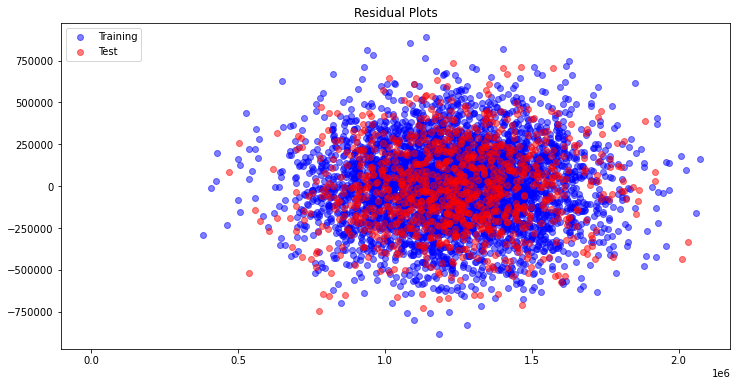

In [135]:
# Scatter plot the training data
plt.figure(figsize= (12, 6))
train = plt.scatter(x = pred_train, y = resid_train , c = 'b', alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test, resid_test , c = 'r', alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y = 0, xmin = -10, xmax = 50)

# Labels
plt.legend((train, test), ('Training','Test'), loc='upper left')
plt.title('Residual Plots')
plt.show()